In [1]:
#202331192 MUHAMAD FAUZI AKBAR PCD F

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import io
import os

In [21]:
img_path = "kompres.jpg"
original_img = Image.open(img_path).convert("RGB")

In [23]:
# Save original image to buffer to get in-memory size
buffer_original = io.BytesIO()
original_img.save(buffer_original, format="JPEG")
original_size_kb = len(buffer_original.getvalue()) / 1024

In [25]:
# Lossy compression (quality=10)
buffer_lossy = io.BytesIO()
original_img.save(buffer_lossy, format="JPEG", quality=10)
lossy_img = Image.open(buffer_lossy)
lossy_size_kb = len(buffer_lossy.getvalue()) / 1024

In [27]:
# RGB Quantization to 4 levels per channel
img_array = np.array(original_img)
quantized_array = ((img_array // 64) * 85).astype(np.uint8)  # 256/4=64, midpoint for each bin is ~85
quantized_img = Image.fromarray(quantized_array)


In [29]:
# Save quantized image to buffer to get in-memory size
buffer_quantized = io.BytesIO()
quantized_img.save(buffer_quantized, format="JPEG")
quantized_size_kb = len(buffer_quantized.getvalue()) / 1024

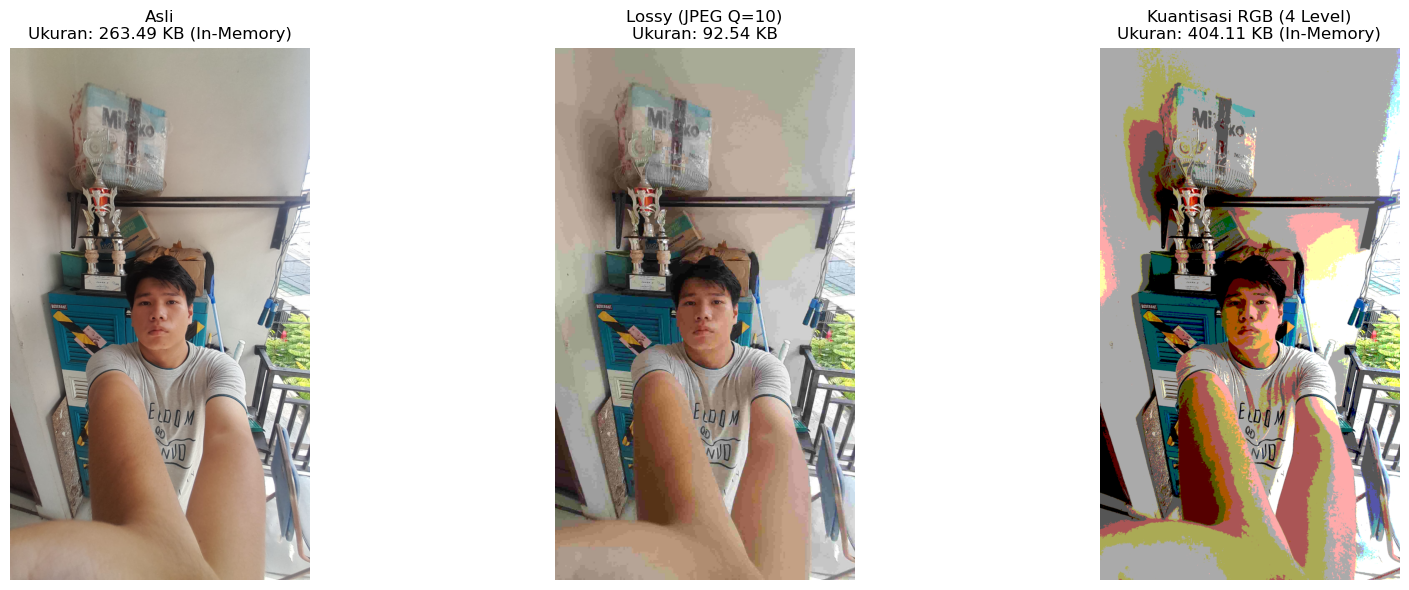

In [31]:
# Plot the images
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
titles = [
    f"Asli\nUkuran: {original_size_kb:.2f} KB (In-Memory)",
    f"Lossy (JPEG Q=10)\nUkuran: {lossy_size_kb:.2f} KB",
    f"Kuantisasi RGB (4 Level)\nUkuran: {quantized_size_kb:.2f} KB (In-Memory)"
]

images = [original_img, lossy_img, quantized_img]

for ax, img, title in zip(axs, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()